# **Domain Mapping for SWEX IOP 10**
## This notebook performs the following tasks:
> - #### Creates a series of maps that show the different geographic domains considered for the SWEX IOP 10 manuscript. Each domain visualized also contains labels of relevant landmarks.

## **Import packages**
#### Links to documentation for packages
> - #### [pathlib](https://docs.python.org/3/library/pathlib.html) | [numpy](https://numpy.org/doc/1.21/) | [xarray](https://docs.xarray.dev/en/stable/) | [pandas](https://pandas.pydata.org/docs/) | [cartopy](https://scitools.org.uk/cartopy/docs/latest/) | [matplotlib](https://matplotlib.org/3.5.3/index.html) | [scalebar](https://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot/63494503#63494503) | 
> - #### Documentation for packages linked above should mostly correspond to the most stable versions, which may not be the exact versions used when creating this notebook.
> - #### Comments are also included in the actual code cells. Some comments contain links that point to places where I copied or adapted code to fit my needs. Although I tried to these include links for all instancs of copying, it is possible that there may code snippets that I did not do this for.

In [1]:
#----------------------------------------------------------------------------------------------------------------------
#entire package imports
import pathlib
import numpy as np
import xarray as xr
import pandas as pd

#cartopy imports
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import cartopy.io.shapereader as shapereader
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#matplotlib imports
import matplotlib.patheffects
import matplotlib.font_manager
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#PIL
import PIL.Image

#Scale bar
import scalebar

#function notebook
%run ./functions_swex_iop_10.ipynb
#----------------------------------------------------------------------------------------------------------------------

ERROR 1: PROJ: proj_create_from_database: Open of /home/sbarc/students/mariandob/mambaforge/envs/swex/share/proj failed


## **Geographic Domain 01: California Overview**
### Notes
> - #### Topography plotted is 1-km WRF topography
> - #### See in line comments for relevant details on code used.

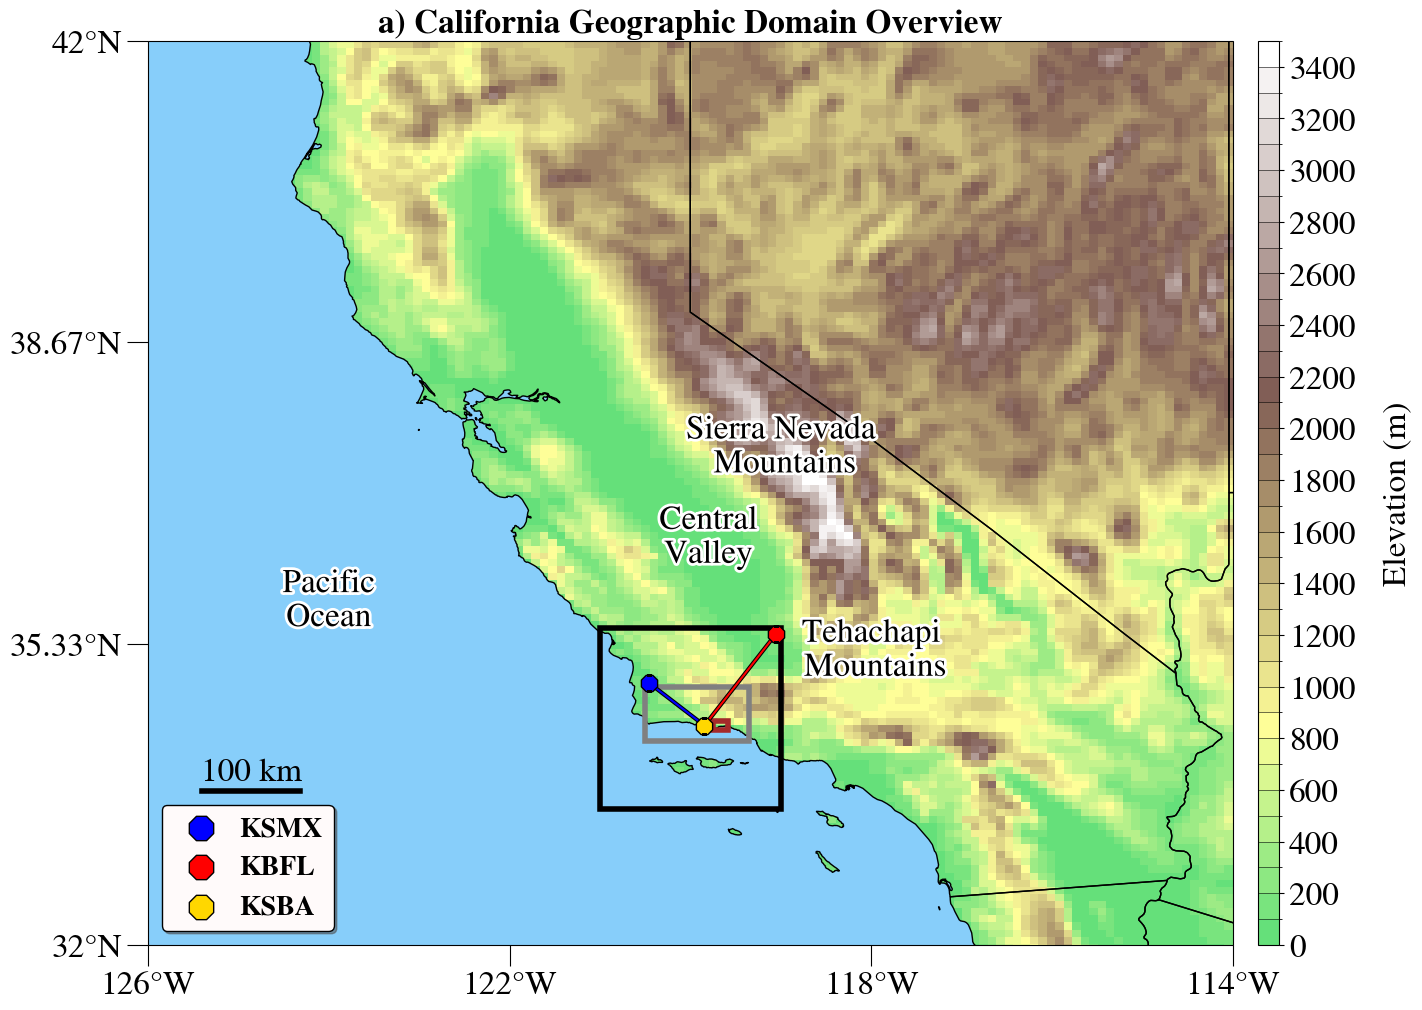

In [3]:
#----------------------------------------------------------------------------------------------------------------------
#Font dictionary for legend
fontdict_legend_labels   = {'size': 20, 'weight': 'bold', 'family':'Nimbus Roman'}
fontdict_title_labels    = {'fontsize': 24, 'fontweight': 'bold', 'fontname': 'Nimbus Roman'}
fontdict_text_annotation = {'fontsize': 24, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}


#Read in csv file with locations for stations in Santa Barbara County during SWEX
instrument_metadata_file = pd.read_csv(pathlib.Path('./data_swex/geographic_plotting_files/santa_barbara/isfs_raws_asos_lidar_radio_station_metadata.csv'))

#Index the pandas csv DataFrame to find lat/lons of the stations we want
ksmx_df  = instrument_metadata_file.loc[instrument_metadata_file['name']=='KSMX']
kbfl_df  = instrument_metadata_file.loc[instrument_metadata_file['name']=='KBFL']
ksba_df  = instrument_metadata_file.loc[instrument_metadata_file['name']=='KSBA']

#Define plot and data coordinate reference system
plot_crs = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

#Make cartopy figure and axis using our created function
fig, ax = cartopy_basemap_subplots(plot_crs=plot_crs, data_crs=data_crs, fig_size=(15,10), 
                                   nrows=1, ncols=1, wspace_float=0, hspace_float=0, 
                                   lon_lat_extent=[-126, -114, 32, 42], 
                                   lon_lat_ticks=[-126, -114, 32, 42], 
                                   lon_lat_tick_num=[4, 4], lon_lat_ticks_on=True, xtick_ytick_set_list=[True],
                                   high_res_coastline=False, 
                                   high_res_wrf_topo_sb_bool=False, 
                                   low_res_wrf_topo_sb_bool=False, 
                                   low_res_wrf_topo_ca_bool=True,
                                   wrf_topo_colorbar_each_plot_bool=True,
                                   wrf_topo_colorbar_entire_figure_bool=False,
                                   scale_bar_bool=True, scale_bar_position=(0.05, 0.17), scale_bar_length=10_0,
                                   inset_ca_bool=False, inset_bbox_position=(0, 0.80, 0.20, 0.19), 
                                   ocean_color='lightskyblue') 
#----------------------------------------------------------------------------------------------------------------------                  
#Plot lines between airport stations
ksmx_to_ksba_line = ax.plot([ksmx_df['longitude'], ksba_df['longitude']], [ksmx_df['latitude'], ksba_df['latitude']], color='blue', transform=data_crs, zorder=10)
kbfl_to_ksba_line = ax.plot([kbfl_df['longitude'], ksba_df['longitude']], [kbfl_df['latitude'], ksba_df['latitude']], color='red',  transform=data_crs, zorder=10)

#Add black edge color for lines
ksmx_to_ksba_line[0].set_path_effects([matplotlib.patheffects.Stroke(linewidth=3, foreground='black'), matplotlib.patheffects.Normal()])
kbfl_to_ksba_line[0].set_path_effects([matplotlib.patheffects.Stroke(linewidth=3, foreground='black'), matplotlib.patheffects.Normal()])

#Add points for KSMX, KBFL, and KSBA
ax.scatter(ksmx_df['longitude'], ksmx_df['latitude'], s=160,  marker='8', color='blue',   edgecolor='black', label='KSMX', transform=data_crs, zorder=10)
ax.scatter(kbfl_df['longitude'], kbfl_df['latitude'], s=160,  marker='8', color='red',    edgecolor='black', label='KBFL', transform=data_crs, zorder=10)
ax.scatter(ksba_df['longitude'], ksba_df['latitude'], s=160,  marker='8', color='gold',   edgecolor='black', label='KSBA', transform=data_crs, zorder=10)

#Add legend
ax.legend(loc='lower left', markerscale=1.5, handletextpad=0.4, fancybox=True, shadow=True, framealpha=1, facecolor='snow', edgecolor='black', prop=fontdict_legend_labels)

#Add title
ax.set_title('a) California Geographic Domain Overview', **fontdict_title_labels)


#Define bounds to draw another square on our map
lon_min_extent = -121.00
lon_max_extent = -119.00
lat_min_extent = 33.50
lat_max_extent = 35.50

#Add rectangle around zoomed region
#https://scitools.org.uk/cartopy/docs/v0.5/matplotlib/introductory_examples/02.polygon.html
ax.add_patch(mpatches.Rectangle(xy=[lon_min_extent, lat_min_extent], 
                                width=abs((lon_min_extent - lon_max_extent)), 
                                height=abs((lat_min_extent-lat_max_extent)), 
                                edgecolor='black', fill=False, linewidth=4, alpha=1, zorder=4, transform=plot_crs))

#Define bounds to draw a square on our map
lon_min_extent = -120.50
lon_max_extent = -119.35
lat_min_extent = 34.25
lat_max_extent = 34.85

#Add rectangle around zoomed region
#https://scitools.org.uk/cartopy/docs/v0.5/matplotlib/introductory_examples/02.polygon.html
ax.add_patch(mpatches.Rectangle(xy=[lon_min_extent, lat_min_extent], 
                                width=abs((lon_min_extent - lon_max_extent)), 
                                height=abs((lat_min_extent-lat_max_extent)), 
                                edgecolor='grey', fill=False, linewidth=4, alpha=1, zorder=4, transform=plot_crs))

#Define bounds to draw another square on our map
lon_min_extent = -119.75
lon_max_extent = -119.58
lat_min_extent = 34.38
lat_max_extent = 34.48

#Add rectangle around zoomed region
#https://scitools.org.uk/cartopy/docs/v0.5/matplotlib/introductory_examples/02.polygon.html
ax.add_patch(mpatches.Rectangle(xy=[lon_min_extent, lat_min_extent], 
                                width=abs((lon_min_extent - lon_max_extent)), 
                                height=abs((lat_min_extent-lat_max_extent)), 
                                edgecolor='brown', fill=False, linewidth=4, alpha=1, zorder=4, transform=plot_crs))

#Define a list of tuples (label, lon, lat) for plotting on map
#('Isla Vista',-119.863440,34.412815)
labels = [('Pacific\nOcean',-124.00,35.80), ('Central\nValley',-119.8,36.50), 
          ('Sierra Nevada\n Mountains',-119.0,37.50), ('Tehachapi\n Mountains',-118.00,35.25)]

#For each label we have annotate that point on the map with the label name
for label_index, (label, lon, lat) in enumerate(labels):

    #Add in label text
    label_text = ax.annotate(label, xy=(lon,lat), xytext=((0,0)), color='black', textcoords='offset points', horizontalalignment='center', verticalalignment='center', zorder=10, **fontdict_text_annotation)

    #Add text effect to label
    #https://matplotlib.org/3.2.1/tutorials/advanced/patheffects_guide.html
    label_text.set_path_effects([matplotlib.patheffects.Stroke(linewidth=4, foreground='white'), matplotlib.patheffects.Normal()])
#----------------------------------------------------------------------------------------------------------------------
#Save figure
plt.savefig('./figures/figure_01_domain_a', bbox_inches='tight', dpi=500)

#Show figure
plt.show()
#----------------------------------------------------------------------------------------------------------------------

## **Geographic Domain 02: Central and Southern California**
### Notes
> - #### Topography plotted is 1-km WRF topography
> - #### See in line comments for relevant details on code used.

In [ ]:
#----------------------------------------------------------------------------------------------------------------------
#Font dictionary for legend
fontdict_legend_labels   = {'size': 20, 'weight': 'bold', 'family':'Nimbus Roman'}
fontdict_title_labels    = {'fontsize': 24, 'fontweight': 'bold', 'fontname': 'Nimbus Roman'}
fontdict_text_annotation = {'fontsize': 24, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}

#Read in csv file with locations for stations in Santa Barbara County during SWEX
instrument_metadata_file = pd.read_csv(pathlib.Path('./data_swex/geographic_plotting_files/santa_barbara/isfs_raws_asos_lidar_radio_station_metadata.csv'))

#Index the pandas csv DataFrame to find lat/lons of the stations we want
ksmx_df  = instrument_metadata_file.loc[instrument_metadata_file['name']=='KSMX']
kbfl_df  = instrument_metadata_file.loc[instrument_metadata_file['name']=='KBFL']
ksba_df  = instrument_metadata_file.loc[instrument_metadata_file['name']=='KSBA']

#Define plot and data coordinate reference system
plot_crs = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

#Make cartopy figure and axis using our created function
fig, ax = cartopy_basemap_subplots(plot_crs=plot_crs, data_crs=data_crs, fig_size=(15,10), 
                                   nrows=1, ncols=1, wspace_float=0, hspace_float=0, 
                                   lon_lat_extent=[-121, -119.00, 33.50, 35.50], 
                                   lon_lat_ticks=[-121, -119.00, 33.50, 35.50], 
                                   lon_lat_tick_num=[4, 4], lon_lat_ticks_on=True, xtick_ytick_set_list=[True],
                                   high_res_coastline=True, 
                                   high_res_wrf_topo_sb_bool=False, 
                                   low_res_wrf_topo_sb_bool=True, 
                                   low_res_wrf_topo_ca_bool=False,
                                   wrf_topo_colorbar_each_plot_bool=True,
                                   wrf_topo_colorbar_entire_figure_bool=False,
                                   scale_bar_bool=True, scale_bar_position=(0.085, 0.17), scale_bar_length=1_0,
                                   inset_ca_bool=False, inset_bbox_position=(0, 0.80, 0.20, 0.19), 
                                   ocean_color='lightskyblue') 
#----------------------------------------------------------------------------------------------------------------------                  
#Plot lines between airport stations
ksmx_to_ksba_line = ax.plot([ksmx_df['longitude'], ksba_df['longitude']], [ksmx_df['latitude'], ksba_df['latitude']], color='blue', transform=data_crs, zorder=10)
kbfl_to_ksba_line = ax.plot([kbfl_df['longitude'], ksba_df['longitude']], [kbfl_df['latitude'], ksba_df['latitude']], color='red',  transform=data_crs, zorder=10)

#Add black edge color for lines
ksmx_to_ksba_line[0].set_path_effects([matplotlib.patheffects.Stroke(linewidth=3, foreground='black'), matplotlib.patheffects.Normal()])
kbfl_to_ksba_line[0].set_path_effects([matplotlib.patheffects.Stroke(linewidth=3, foreground='black'), matplotlib.patheffects.Normal()])

#Add points for KSMX, KBFL, and KSBA
ax.scatter(ksmx_df['longitude'], ksmx_df['latitude'], s=160,  marker='8', color='blue',   edgecolor='black', label='KSMX', transform=data_crs, zorder=10)
ax.scatter(kbfl_df['longitude'], kbfl_df['latitude'], s=160,  marker='8', color='red',    edgecolor='black', label='KBFL', transform=data_crs, zorder=10)
ax.scatter(ksba_df['longitude'], ksba_df['latitude'], s=160,  marker='8', color='gold',   edgecolor='black', label='KSBA', transform=data_crs, zorder=10)

#Add legend
ax.legend(loc='lower left', markerscale=1.5, handletextpad=0.4, fancybox=True, shadow=True, framealpha=1, facecolor='snow', edgecolor='black', prop=fontdict_legend_labels)

#Add title
ax.set_title('b) KSMX, KSBA, and KBFL ASOS Station Locations', **fontdict_title_labels)

#Define bounds to draw a square on our map
lon_min_extent = -120.50
lon_max_extent = -119.35
lat_min_extent = 34.25
lat_max_extent = 34.85

#Add rectangle around zoomed region
#https://scitools.org.uk/cartopy/docs/v0.5/matplotlib/introductory_examples/02.polygon.html
ax.add_patch(mpatches.Rectangle(xy=[lon_min_extent, lat_min_extent], 
                                width=abs((lon_min_extent - lon_max_extent)), 
                                height=abs((lat_min_extent-lat_max_extent)), 
                                edgecolor='grey', fill=False, linewidth=4, alpha=1, zorder=4, transform=plot_crs))

#Define bounds to draw another square on our map
lon_min_extent = -119.75
lon_max_extent = -119.58
lat_min_extent = 34.38
lat_max_extent = 34.48

#Add rectangle around zoomed region
#https://scitools.org.uk/cartopy/docs/v0.5/matplotlib/introductory_examples/02.polygon.html
ax.add_patch(mpatches.Rectangle(xy=[lon_min_extent, lat_min_extent], 
                                width=abs((lon_min_extent - lon_max_extent)), 
                                height=abs((lat_min_extent-lat_max_extent)), 
                                edgecolor='brown', fill=False, linewidth=4, alpha=1, zorder=4, transform=plot_crs))

#Define a list of tuples (label, lon, lat) for plotting on map
labels = [('Pacific\nOcean',-120.70,34.30), ('Central\nValley',-119.400,35.3), 
          ('Santa Ynez\nValley',-120.20,34.65),
          ('San Rafael\nMountains',-119.60,34.70), ('Santa Ynez Mountains',-119.80,34.50)]

#For each label we have annotate that point on the map with the label name
for label_index, (label, lon, lat) in enumerate(labels):

    #Add in label text
    label_text = ax.annotate(label, xy=(lon,lat), xytext=((0,0)), color='black', textcoords='offset points', horizontalalignment='center', verticalalignment='center', zorder=10, **fontdict_text_annotation)

    #Add text effect to label
    #https://matplotlib.org/3.2.1/tutorials/advanced/patheffects_guide.html
    label_text.set_path_effects([matplotlib.patheffects.Stroke(linewidth=4, foreground='white'), matplotlib.patheffects.Normal()])
#----------------------------------------------------------------------------------------------------------------------
#Save figure
plt.savefig('./figures/figure_01_domain_b', bbox_inches='tight', dpi=500)

#Show figure
plt.show()
#----------------------------------------------------------------------------------------------------------------------

## **Geographic Domain 03: Santa Barbara and SWEX Domain**
### Notes
> - #### Topography plotted is 50m topography generated by Gert-Jan Duine.
> - #### See in line comments for relevant details on code used.

In [ ]:
#-----------------------------------------------------
#Font dictionary for legend
fontdict_legend_labels   = {'size': 20, 'weight': 'bold', 'family':'Nimbus Roman'}
fontdict_title_labels    = {'fontsize': 24, 'fontweight': 'bold', 'fontname': 'Nimbus Roman'}
fontdict_text_annotation = {'fontsize': 24, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}

#Define plot and data coordinate reference system
plot_crs = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

#Make cartopy figure and axis using our created function
fig, ax = cartopy_basemap_subplots(plot_crs=plot_crs, data_crs=data_crs, fig_size=(15,10), 
                                   nrows=1, ncols=1, wspace_float=0, hspace_float=0, 
                                   lon_lat_extent=[-120.50, -119.35, 34.25, 34.85], 
                                   lon_lat_ticks=[-120.50, -119.35, 34.25, 34.85], 
                                   lon_lat_tick_num=[4, 4], lon_lat_ticks_on=True, xtick_ytick_set_list=[True],
                                   high_res_coastline=True, 
                                   high_res_wrf_topo_sb_bool=True, 
                                   low_res_wrf_topo_sb_bool=False, 
                                   low_res_wrf_topo_ca_bool=False,
                                   wrf_topo_colorbar_each_plot_bool=True,
                                   wrf_topo_colorbar_entire_figure_bool=False,
                                   scale_bar_bool=True, scale_bar_position=(0.12, 0.24), scale_bar_length=1_0,
                                   inset_ca_bool=False, inset_bbox_position=(0, 0.80, 0.20, 0.19), 
                                   ocean_color='lightskyblue') 
#-----------------------------------------------------
#Create a pathlib object that points to the instrument csv file we need to plot instrument locatiosn
path_to_swex_instrument_location_file = pathlib.Path('./data_swex/geographic_plotting_files/santa_barbara/isfs_raws_asos_lidar_radio_station_metadata.csv')

#Define strings for stations we want to find within each station network
isfs_station_str_list  = ['s03', 's04', 's05', 's11', 's12', 's14', 's15', 's16', 's17']
raws_station_str_list  = ['LPOC1', 'RHWC1', 'SBVC1', 'MTIC1']
asos_station_str_list  = ['KIZA', 'KSBA']
radio_station_str_list = ['RANCHO_RADIO', 'MFD2_RADIO']

#Read in csv file with locations for SWEX instruments
instrument_metadata_file = pd.read_csv(path_to_swex_instrument_location_file)

#Index csv file with locations for each specific instrument type we want to plot on the map
isfs_df  = instrument_metadata_file.loc[instrument_metadata_file['name'].isin(isfs_station_str_list)]
raws_df  = instrument_metadata_file.loc[instrument_metadata_file['name'].isin(raws_station_str_list)]
asos_df  = instrument_metadata_file.loc[instrument_metadata_file['name'].isin(asos_station_str_list)]
lidar_df = instrument_metadata_file.loc[instrument_metadata_file['network']=='LIDAR']
radio_df = instrument_metadata_file.loc[instrument_metadata_file['name'].isin(radio_station_str_list)]    

#Add points for lidar, radiosonde, synoptic, and ISFS locations
ax.scatter(lidar_df['longitude'], lidar_df['latitude'], s=200, marker='s', color='black',   edgecolor='black', label='LiDAR',      transform=data_crs, zorder=10)
ax.scatter(radio_df['longitude'], radio_df['latitude'], s=250, marker='*', color='fuchsia', edgecolor='black', label='Radiosonde', transform=data_crs, zorder=11)
ax.scatter(isfs_df['longitude'], isfs_df['latitude'],   s=200, marker='o', color='red',     edgecolor='black', label='ISFS',       transform=data_crs, zorder=10)
ax.scatter(raws_df['longitude'], raws_df['latitude'],   s=200, marker='^', color='blue',    edgecolor='black', label='RAWS',       transform=data_crs, zorder=10)
ax.scatter(asos_df['longitude'], asos_df['latitude'],   s=200, marker='8', color='gold',    edgecolor='black', label='ASOS',       transform=data_crs, zorder=10)
#-----------------------------------------------------
#Add legend
ax.legend(loc='lower left', ncols=2, markerscale=1.5, handletextpad=0.4, fancybox=True, shadow=True, framealpha=1, facecolor='snow', edgecolor='black', prop=fontdict_legend_labels)

#Add title
ax.set_title('c) SWEX IOP #10 Santa Barbara Domain', **fontdict_title_labels)

#Define bounds to draw another square on our map
lon_min_extent = -119.75
lon_max_extent = -119.58
lat_min_extent = 34.38
lat_max_extent = 34.48

#Add rectangle around zoomed region
#https://scitools.org.uk/cartopy/docs/v0.5/matplotlib/introductory_examples/02.polygon.html
ax.add_patch(mpatches.Rectangle(xy=[lon_min_extent, lat_min_extent], 
                                width=abs((lon_min_extent - lon_max_extent)), 
                                height=abs((lat_min_extent-lat_max_extent)), 
                                edgecolor='brown', fill=False, linewidth=4, alpha=1, zorder=4, transform=plot_crs))

#Define a list of tuples (label, lon, lat) for plotting on map
labels = [('Pacific\nOcean', -119.70, 34.30), ('Point\nConception', -120.42, 34.48), ('SBCFD-38', -120.20, 34.44),
          ('s12', -120.155, 34.507), ('Santa Ynez\nValley', -120.2, 34.62), ('KIZA', -120.025, 34.605),
          ('RHWC1', -120.01, 34.515), ('s05', -120.08, 34.48), ('s03', -119.99, 34.465),
          ('s14', -120.01, 34.695), ('s15', -119.97, 34.735), ('s16', -119.705, 34.60),
          ('s17', -119.445, 34.745), ('RA', -119.915, 34.56), ('San Rafael\n Mountains', -119.68, 34.70),
          ('KSBA', -119.79, 34.42), ('LPOC1', -119.73, 34.54), ('s11', -119.61, 34.49),
          ('s04', -119.77, 34.48), ('SBCFD-HQ', -119.86, 34.45), ('Gaviota\nPass', -120.25, 34.505)]

#For each label we have annotate that point on the map with the label name
for label_index, (label, lon, lat) in enumerate(labels):

    #Add in label text
    label_text = ax.annotate(label, xy=(lon,lat), xytext=((0,0)), color='black', textcoords='offset points', horizontalalignment='center', verticalalignment='center', zorder=10, **fontdict_text_annotation)

    #Add text effect to label
    #https://matplotlib.org/3.2.1/tutorials/advanced/patheffects_guide.html
    label_text.set_path_effects([matplotlib.patheffects.Stroke(linewidth=4, foreground='white'), matplotlib.patheffects.Normal()])
#-----------------------------------------------------
#Save figure
plt.savefig('./figures/figure_01_domain_c.png', bbox_inches='tight', dpi=500)

#Show figure
plt.show()
#-----------------------------------------------------

## **Geographic Domain 04: Eastern Santa Barbara Domain**
### Notes
> - #### Topography plotted is 50m topography generated by Gert-Jan Duine.
> - #### See in line comments for relevant details on code used.

In [ ]:
#-----------------------------------------------------
#Font dictionary for legend
fontdict_legend_labels   = {'size': 20, 'weight': 'bold', 'family':'Nimbus Roman'}
fontdict_title_labels    = {'fontsize': 24, 'fontweight': 'bold', 'fontname': 'Nimbus Roman'}
fontdict_text_annotation = {'fontsize': 24, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}


#Define plot and data coordinate reference system
plot_crs = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

#Make cartopy figure and axis using our created function
fig, ax = cartopy_basemap_subplots(plot_crs=plot_crs, data_crs=data_crs, fig_size=(15,10), 
                                   nrows=1, ncols=1, wspace_float=0, hspace_float=0, 
                                   lon_lat_extent=[-119.75, -119.58, 34.38, 34.48], 
                                   lon_lat_ticks=[-119.75, -119.58, 34.38, 34.48], 
                                   lon_lat_tick_num=[4, 4], lon_lat_ticks_on=True, xtick_ytick_set_list=[True],
                                   high_res_coastline=True, 
                                   high_res_wrf_topo_sb_bool=True, 
                                   low_res_wrf_topo_sb_bool=False, 
                                   low_res_wrf_topo_ca_bool=False,
                                   wrf_topo_colorbar_each_plot_bool=True,
                                   wrf_topo_colorbar_entire_figure_bool=False,
                                   scale_bar_bool=True, scale_bar_position=(0.02, 0.15), scale_bar_length=0o1,
                                   inset_ca_bool=False, inset_bbox_position=(0, 0.80, 0.20, 0.19), 
                                   ocean_color='lightskyblue') 
#-----------------------------------------------------
#Create a pathlib object that points to the instrument csv file we need to plot instrument locatiosn
path_to_swex_instrument_location_file = pathlib.Path('./data_swex/geographic_plotting_files/santa_barbara/isfs_raws_asos_lidar_radio_station_metadata.csv')

#Define strings for stations we want to find within each station network
raws_station_str_list  = ['SBVC1', 'MTIC1']
radio_station_str_list = ['MFD2_RADIO']

#Read in csv file with locations for SWEX instruments
instrument_metadata_file = pd.read_csv(path_to_swex_instrument_location_file)

#Index csv file with locations for each specific instrument type we want to plot on the map
raws_df  = instrument_metadata_file.loc[instrument_metadata_file['name'].isin(raws_station_str_list)]
lidar_df = instrument_metadata_file.loc[instrument_metadata_file['network']=='LIDAR']
radio_df = instrument_metadata_file.loc[instrument_metadata_file['name'].isin(radio_station_str_list)]    

#Add points for lidar, radiosonde, synoptic, and ISFS locations
ax.scatter(lidar_df['longitude'], lidar_df['latitude'], s=200, marker='s', color='black',   edgecolor='black', label='LiDAR',      transform=data_crs, zorder=10)
ax.scatter(radio_df['longitude'], radio_df['latitude'], s=250, marker='*', color='fuchsia', edgecolor='black', label='Radiosonde', transform=data_crs, zorder=11)
ax.scatter(raws_df['longitude'], raws_df['latitude'],   s=200, marker='^', color='blue',    edgecolor='black', label='RAWS',       transform=data_crs, zorder=10)
#-----------------------------------------------------
#Define SCE station strings that we want to read in
station_id_str_list = ['351SE', 'SE492', 'SE745', 'SE505', 'SE750', 
                       'SE507', '421SE', 'SE234', 'SE504', 'SE741', 
                       'SE737', 'SE738', 'SE760', 'SE516', 'SE765', 
                       'SE053']

#For every SCE station we have, do the following
for station_index, station_id in enumerate(station_id_str_list):
    
    #Create a pathlib object for the station file
    file = pathlib.Path('./SWEX2022_datasets/SCE/').glob(f'*{station_id}*')
    
    #Open the file using xarray
    ds = xr.open_dataset(list(file)[0])
    
    #If we are plotting the first station location, do the following:
    if station_index == 0:
        
        #Add point that shows SCE station location (with legend label)
        ax.scatter(ds.longitude, ds.latitude, s=200,  marker='o', color='brown', edgecolor='black', label='SCE Station', transform=data_crs, zorder=10)
    else:
        #Add point that shows SCE station location (WITHOUT legend label)
        ax.scatter(ds.longitude, ds.latitude, s=200,  marker='o', color='brown', edgecolor='black', transform=data_crs, zorder=10)
#-----------------------------------------------------
#Define a list of tuples (label, lon, lat) for plotting on map
#('Isla Vista',-119.863440,34.412815)
labels = [('BOT',-119.708,34.46), ('SBVC1',-119.696,34.456), 
          ('MTIC1',-119.64,34.461), ('MFS2',-119.660,34.4445),
          ('Montecito',-119.65,34.415), ('Santa\nBarbara',-119.710209, 34.413321), 
          ('Santa Ynez Mountains',-119.63,34.47), ('Pacific Ocean',-119.65,34.395)]

#For each label we have annotate that point on the map with the label name
for label_index, (label, lon, lat) in enumerate(labels):

    #Add in label text
    label_text = ax.annotate(label, xy=(lon,lat), xytext=((0,0)), color='black', textcoords='offset points', horizontalalignment='center', verticalalignment='center', **fontdict_text_annotation)

    #Add text effect to label
    #https://matplotlib.org/3.2.1/tutorials/advanced/patheffects_guide.html
    label_text.set_path_effects([matplotlib.patheffects.Stroke(linewidth=4, foreground='white'), matplotlib.patheffects.Normal()])
#-----------------------------------------------------
#Add legend
ax.legend(loc='lower left', ncols=2, markerscale=1.5, handletextpad=0.4, fancybox=True, shadow=True, framealpha=1, facecolor='snow', edgecolor='black', prop=fontdict_legend_labels)

#Add title
ax.set_title('d) SCE Station Locations in Eastern Santa Barbara Domain', **fontdict_title_labels)
#-----------------------------------------------------
#Save figure
plt.savefig('./figures/figure_01_domain_d.png', bbox_inches='tight', dpi=500)

#Show figure
plt.show()
#-----------------------------------------------------

## **Use "ImageMagick" to create a multi-panel figure from all individual figures**
#### **Notes**
> - #### Once we have generated all figures above, run the following command below to use the command line tool "ImageMagick" to create the full Figure 1.

In [ ]:
! convert \( ./figures/figure_01_domain_a.png ./figures/figure_01_domain_b.png -gravity center +append \) \( ./figures/figure_01_domain_c.png ./figures/figure_01_domain_d.png -gravity center +append \) -gravity center -append ./figures/figure_01_combined.png